Solo en cloud notebook (Google, Kaggle)

In [ ]:
# !pip install ultralytics opencv-python --quiet
# !pip install open_clip_torch

Inicializa el detector y el clasificador.

In [1]:
from yolo_detector import YOLODetector
from clip_classifier import CLIPClassifier

# Rutas de entrada y salida
INPUT_DIR = "input"
OUTPUT_DIR = "output"

# Ruta a los modelos entrenados
YOLO_MODEL_PATH = "models/yolo_model.pt"
CLIP_MODEL_PATH = "models/open_clip_model.safetensors"

# Inicializar detector y clasificador
detector = YOLODetector(model_path=YOLO_MODEL_PATH)  
classifier = CLIPClassifier(checkpoint_path=CLIP_MODEL_PATH)

/home/gcprado/anaconda3/envs/ims/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ YOLO model loaded from: models/yolo_model.pt
Using device: cpu


✅ CLIP model loaded from checkpoint: models/open_clip_model.safetensors


Inicializa base de datos.

In [2]:
from inventory_db import InventoryDB

inventory_db = InventoryDB()

✅ Inventory database initialized.


Inferencia del modelo

In [3]:
from reporter import BatchYOLOReporter

reporter = BatchYOLOReporter(detector)

reporter.snapshot_invetory(INPUT_DIR)

Procesando 3 imágenes...

 Proceso terminado.


In [4]:
reporter.print_summary('output/2026-01-07_14-01-01')


 RESUMEN DE DETECCIONES DE output/2026-01-07_14-01-01
SECCION-BEBIDAS-3    -> 148  productos
SECCION-BEBIDAS-4    -> 288  productos
SECCION-BEBIDAS-5    -> 237  productos


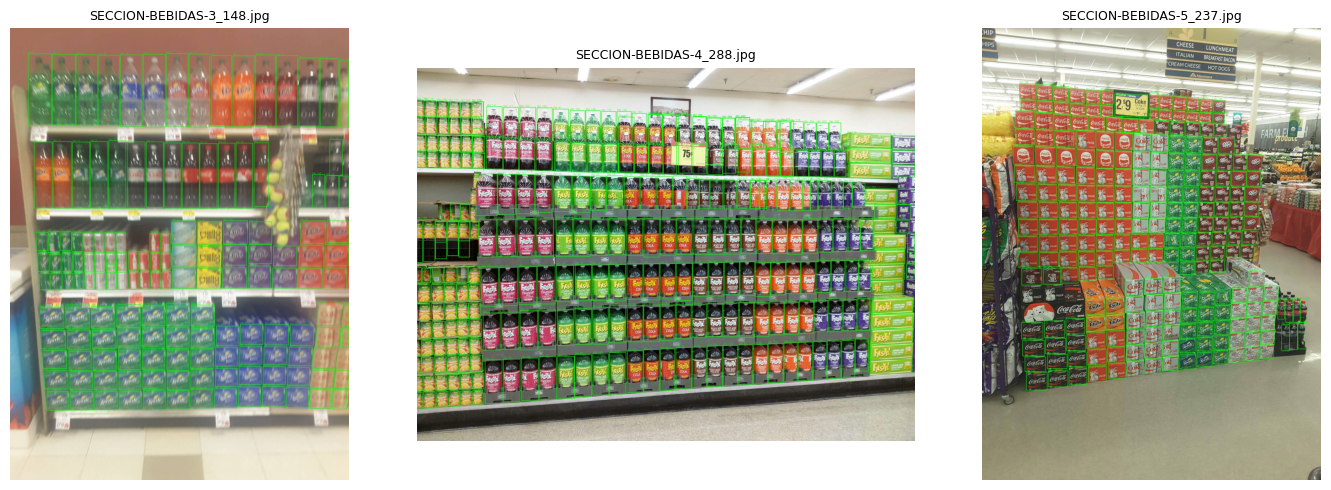

In [5]:
reporter.show_summary('output/2026-01-07_14-01-01')

Clases candidatas para zero shot

In [ ]:
section_products = {
    "SECCION-BEBIDAS": ["coca_cola", "fanta", "pepsi", "sprite", "dr_pepper", 
                        "fiesta strawberry", "fiesta lime", "fiesta cola", "fiesta root beer", "fiesta orange", "fiesta grape", "water"],
    "SECCION-ASEO": ["lays", "pringles", "snickers", "kitkat"],
    "SECCION-LIMPIEZA": ["detergente", "cloro", "esponja"]
}


Predecir producto con zero short

In [ ]:
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

df = pd.read_csv("output/2026-01-07_14-01-01/bboxes_2026-01-07_14-01-01.csv")

for _, row in df.iterrows():
    img_path = os.path.join(INPUT_DIR, row["image_file"])
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    x1, y1, x2, y2 = eval(row["bbox:"])  # bbox está como lista en string
    roi = image[int(y1):int(y2), int(x1):int(x2)]
    
    section = row["section"]
    print(repr(section))
    class_names = section_products.get(section, [])
    
    if class_names:
        predicted = classifier.classify(roi, class_names)
        print(f"{row['image_file']} -> {predicted}")
    else:
        print(f"{row['image_file']} -> No classes for section {section}")

    # Plot the ROI inline with the predicted label
    plt.figure(figsize=(4,4))
    plt.imshow(roi)
    plt.axis("off")
    plt.title(predicted)
    plt.show()

Prueba de clasificacion

In [ ]:
import matplotlib.pyplot as plt

detected_products = []

# Número de objetos detectados
num_objs = len(boxes)

# Configurar figure con filas y columnas
cols = 5
rows = (num_objs + cols - 1) // cols  # redondear hacia arriba
plt.figure(figsize=(cols*3, rows*3))

for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
    roi = image[y1:y2, x1:x2]

    # Clasificar ROI
    product_name = classify_product(roi)
    detected_products.append(product_name)

    # Crear subplot
    plt.subplot(rows, cols, i+1)
    plt.imshow(roi)
    plt.title(product_name, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

prueba ordenada

In [ ]:
import matplotlib.pyplot as plt

# Inicializar lista de productos detectados
detected_products = []

# Diccionario para agrupar ROIs por clase
rois_by_class = {p: [] for p in PRODUCT_NAMES}

# Clasificar y agrupar ROIs
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
    roi = image[y1:y2, x1:x2]

    product_name = classify_product(roi)
    detected_products.append(product_name)

    # Agregar ROI al diccionario
    if product_name not in rois_by_class:
        rois_by_class[product_name] = []  # manejar nuevas clases
    rois_by_class[product_name].append(roi)

# Plotear por producto
for product in PRODUCT_NAMES:
    rois = rois_by_class.get(product, [])
    if len(rois) == 0:
        continue  # saltar si no hay detecciones

    print(f"\n=== {product} ({len(rois)} detecciones) ===")

    # Configurar figure para este producto
    cols = 5
    rows = (len(rois) + cols - 1) // cols
    plt.figure(figsize=(cols*3, rows*3))

    for i, roi in enumerate(rois):
        plt.subplot(rows, cols, i+1)
        plt.imshow(roi)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


Procesa deteccion y almacena usando etiqueta de lvm simulado

Producto 1: snickers bar
Producto 2: snickers bar
Producto 3: butter package
Producto 4: butter package
Producto 5: butter package
Producto 6: lays chips bag
Producto 7: pringles can
Producto 8: butter package
Producto 9: butter package
Producto 10: butter package
Producto 11: butter package
Producto 12: lays chips bag
Producto 13: butter package
Producto 14: snickers bar
Producto 15: evian water bottle
Producto 16: butter package
Producto 17: pringles can
Producto 18: coke can
Producto 19: butter package
Producto 20: butter package
Producto 21: monster energy drink can
Producto 22: butter package
Producto 23: butter package
Producto 24: butter package
Producto 25: butter package
Producto 26: lays chips bag
Producto 27: snickers bar
Producto 28: butter package
Producto 29: coke can
Producto 30: pringles can
Producto 31: butter package
Producto 32: monster energy drink can
Producto 33: lays chips bag
Producto 34: butter package
Producto 35: butter package
Producto 36: lays chips bag
Pro

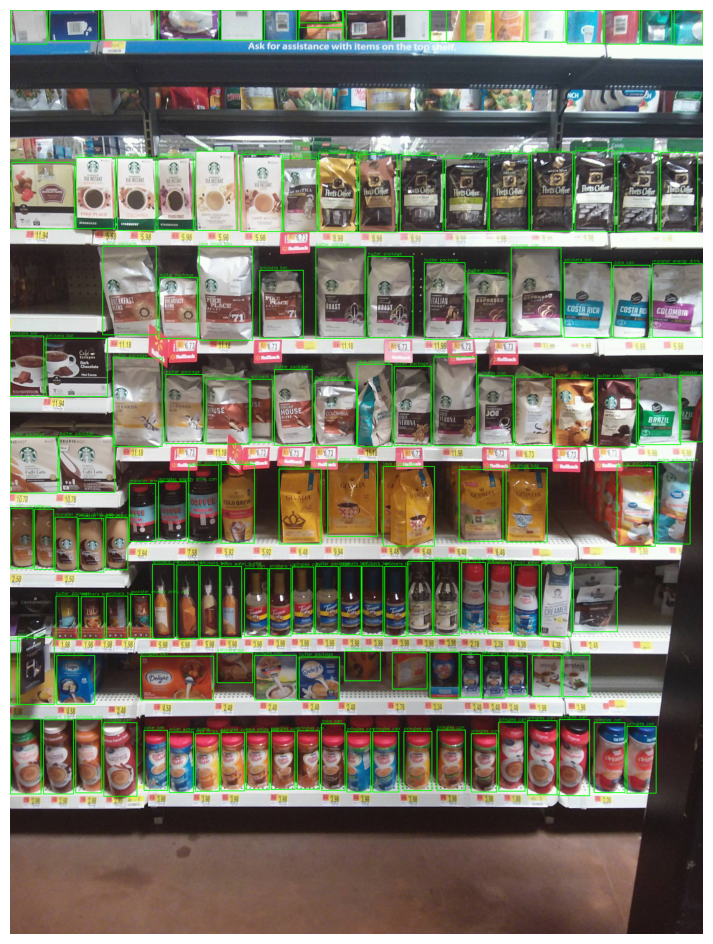

['snickers bar', 'snickers bar', 'butter package', 'butter package', 'butter package', 'lays chips bag', 'pringles can', 'butter package', 'butter package', 'butter package', 'butter package', 'lays chips bag', 'butter package', 'snickers bar', 'evian water bottle', 'butter package', 'pringles can', 'coke can', 'butter package', 'butter package', 'monster energy drink can', 'butter package', 'butter package', 'butter package', 'butter package', 'lays chips bag', 'snickers bar', 'butter package', 'coke can', 'pringles can', 'butter package', 'monster energy drink can', 'lays chips bag', 'butter package', 'butter package', 'lays chips bag', 'butter package', 'pringles can', 'butter package', 'butter package', 'lays chips bag', 'lays chips bag', 'butter package', 'pringles can', 'snickers bar', 'pringles can', 'butter package', 'butter package', 'pringles can', 'evian water bottle', 'monster energy drink can', 'lays chips bag', 'lays chips bag', 'pringles can', 'butter package', 'butter p

In [21]:
# -------------------------------
# Procesar detecciones y almacenar productos
# -------------------------------
detected_products = []
img_draw = image.copy()

for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
    roi = image[y1:y2, x1:x2]

    product_name = classify_product(roi)
    print(f"Producto {i+1}: {product_name}")
    detected_products.append(product_name)

    # Dibujar bounding box con etiqueta
    cv2.rectangle(img_draw, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(img_draw, product_name, (x1, y1-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

# -------------------------------
# Mostrar imagen con detecciones
# -------------------------------
plt.figure(figsize=(12,12))
plt.imshow(img_draw)
plt.axis("off")
plt.show()

print(detected_products)

# # -------------------------------
# # Crear fila de inventario con conteos por producto + timestamp
# # -------------------------------
# from collections import Counter
# from datetime import datetime

# counts = Counter(detected_products)
# counts["timestamp"] = datetime.now()

# # Añadir columnas nuevas al DataFrame global dinámicamente
# for col in counts:
#     if col not in df_inventory_global.columns:
#         # Insertar la nueva columna justo antes de la última columna
#         df_inventory_global.insert(len(df_inventory_global.columns)-1, col, 0)

# # Añadir la fila
# df_inventory_global = pd.concat([df_inventory_global, pd.DataFrame([counts])], ignore_index=True)


# # -------------------------------
# # Limpiar tipos y NaN
# # -------------------------------
# # Reemplazar NaN por 0 y asegurar que las columnas de productos sean enteros
# for col in df_inventory_global.columns:
#     if col != "timestamp":
#         # Convertir a numérico, NaN -> 0, luego a int
#         df_inventory_global[col] = pd.to_numeric(df_inventory_global[col], errors='coerce').fillna(0).astype(int)

# df_inventory_global


Simula DB con productos decrecientes para probar graficas

In [ ]:
# -------------------------------
# Simulate a "realistic" decreasing inventory
# -------------------------------

import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

products = ["coke_can", "pringles", "evian_water", "snickers", "lays"]

# Number of snapshots
num_snapshots = 5
base_time = datetime.now() - timedelta(days=1)

snapshots = []

# Step 1: Initialize starting counts
start_counts = {p: random.randint(15, 25) for p in products}

# Step 2: Generate decreasing counts over time
for i in range(num_snapshots):
    timestamp = base_time + timedelta(hours=i*6)
    snapshot = {}
    for p in products:
        # Decrease by random amount between 0 and 5, but never below 0
        if i == 0:
            snapshot[p] = start_counts[p]
        else:
            snapshot[p] = max(snapshots[-1][p] - random.randint(0, 5), 0)
    snapshot["timestamp"] = timestamp
    snapshots.append(snapshot)

# Convert to DataFrame
db_mock = pd.DataFrame(snapshots)
print("Simulated 'decreasing' DB:")
db_mock

In [ ]:
# -------------------------------
# Cell 2: Load inventory variables
# -------------------------------

# Choose two snapshots to compare
snapshot1 = db_mock.iloc[0]  # earliest snapshot
snapshot2 = db_mock.iloc[-1] # latest snapshot

# Convert to dictionaries for plotting
inventory1 = {p: snapshot1[p] for p in products}
inventory2 = {p: snapshot2[p] for p in products}

# Save timestamps as metadata
timestamp1 = snapshot1["timestamp"]
timestamp2 = snapshot2["timestamp"]

print("Inventory 1:", inventory1)
print("Inventory 2:", inventory2)
print("Timestamps:", timestamp1, "->", timestamp2)


In [ ]:
# -------------------------------
# Cell 3: Print graphs
# -------------------------------

import matplotlib.pyplot as plt

# --- Graph 1: Counts per class ---
x = range(len(products))

plt.figure(figsize=(10, 5))
plt.bar([i-0.15 for i in x], [inventory1[p] for p in products], width=0.3, label=f"T1: {timestamp1}")
plt.bar([i+0.15 for i in x], [inventory2[p] for p in products], width=0.3, label=f"T2: {timestamp2}")
plt.xticks(x, products)
plt.ylabel("Item Count")
plt.title("Product Counts per Class")
plt.legend()
plt.show()

# --- Graph 2: Items added / removed ---
diff = {p: inventory2[p] - inventory1[p] for p in products}
colors = ['green' if v >= 0 else 'red' for v in diff.values()]

plt.figure(figsize=(10, 5))
plt.bar(products, diff.values(), color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Items Added/Removed")
plt.title(f"Inventory Changes from {timestamp1} to {timestamp2}")
plt.show()

# -------------------------------
# Line plot: Evolution of products over time
# -------------------------------

# Extract timestamps
timestamps = db_mock["timestamp"]

plt.figure(figsize=(12, 6))

# Plot each product as a line
for product in products:
    plt.plot(timestamps, db_mock[product], marker='o', label=product)

plt.xlabel("Timestamp")
plt.ylabel("Item Count")
plt.title("Inventory Evolution Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

threshold = 3  # stock shortage threshold

# Convert timestamps to numeric values (hours since first snapshot)
X = np.array([(t - db_mock["timestamp"].iloc[0]).total_seconds()/3600 for t in db_mock["timestamp"]]).reshape(-1, 1)

for product in products:
    y = db_mock[product].values

    plt.figure(figsize=(8, 5))

    # Plot actual inventory points
    plt.plot(db_mock["timestamp"], y, 'o-', label=f"{product} (actual)")

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Predict future trend (extend 24 hours beyond last snapshot)
    future_hours = np.linspace(0, X[-1][0]+24, 100).reshape(-1, 1)
    y_pred = model.predict(future_hours)
    future_times = [db_mock["timestamp"].iloc[0] + pd.Timedelta(hours=h[0]) for h in future_hours]

    # Plot predicted line
    plt.plot(future_times, y_pred, '--', label=f"{product} (predicted)")

    # Find crossing point with threshold
    if model.coef_[0] != 0:
        hours_to_threshold = (threshold - model.intercept_) / model.coef_[0]
        if hours_to_threshold > 0:
            t_cross = db_mock["timestamp"].iloc[0] + pd.Timedelta(hours=hours_to_threshold)
            plt.plot(t_cross, threshold, 'rx', markersize=10)
            plt.text(t_cross, threshold+0.5, f"Predicted shortage", color='red')

    # Draw threshold line
    plt.axhline(y=threshold, color='gray', linestyle='--', label=f"Threshold = {threshold}")

    plt.xlabel("Timestamp")
    plt.ylabel("Item Count")
    plt.title(f"Inventory Evolution and Prediction: {product}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image

# Modelo preentrenado
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Imagen de ejemplo (máscara segmentada por SAM)
image = Image.open("mask_coca_can.jpg")

# Categorías posibles
categories = ["coca_can", "pringles", "evian_water"]

# Procesamiento
inputs = processor(text=categories, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

# logits_per_image → predicción de la categoría
logits = outputs.logits_per_image
predicted_idx = logits.argmax().item()
print("Categoría predicha:", categories[predicted_idx])
